# pretraining

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Data

In [12]:
data = np.load("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/stanford_dogs/stanford_dogs_224x224.npy",allow_pickle=True)

In [14]:
xTrain, yTrain, xValid, yValid, xTest, yTest, dogs_name_list = data

In [27]:
xTrain = xTrain.astype('float32')/255
xValid = xValid.astype('float32')/255
xTest = xTest.astype('float32')/255

In [28]:
print(xTrain.shape)
print(yTrain.shape)
print("")

print(xValid.shape)
print(yValid.shape)
print("")

print(xTest.shape)
print(yTest.shape)
print("")

(15000, 224, 224, 3)
(15000, 120)

(2000, 224, 224, 3)
(2000, 120)

(3580, 224, 224, 3)
(3580, 120)



In [25]:
import seaborn as sns

/Users/changmin.kim/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/changmin.kim/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/changmin.kim/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


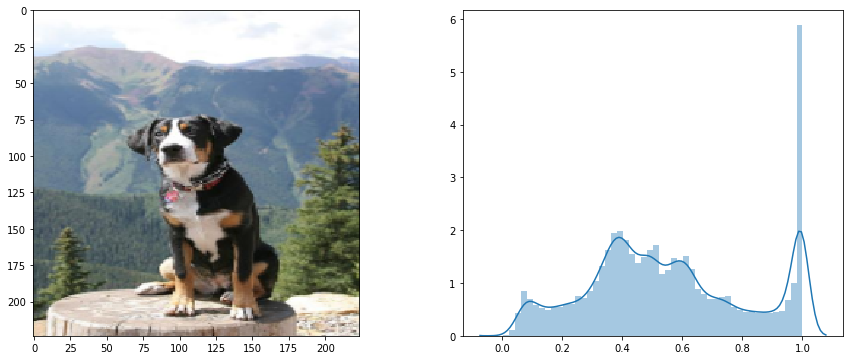

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.imshow(xTrain[0])
plt.subplot(1,2,2)
sns.distplot(xTrain[0].reshape(224*224*3,1))
plt.show()

## Feature Extraction

In [1]:
from tensorflow.keras.applications import InceptionV3

In [2]:
inception_bottle_neck = InceptionV3(weights="imagenet",include_top=False,input_shape=(224,224,3), pooling="avg")

In [3]:
inception_bottle_neck.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [40]:
input_size = 224
num_classes = 120
S=1
train_len = len(xTrain)

In [41]:
train_len

15000

In [42]:
train_i_bf = inception_bottle_neck.predict(xTrain,batch_size=32,verbose=1)

3580/3580 [==============================] - 90s 25ms/sample


In [45]:
valid_i_bf = inception_bottle_neck.predict(xValid,batch_size=32,verbose=1)
test_i_bf = inception_bottle_neck.predict(xTest,batch_size=32,verbose=1)

3580/3580 [==============================] - 82s 23ms/sample


In [46]:
print('train_inception feature shape:',train_i_bf.shape)
print('valid_inception feature shape:',valid_i_bf.shape)
print('test_inception feature shape:',test_i_bf.shape)

train_inception feature shape: (15000, 2048)
valid_inception feature shape: (2000, 2048)
test_inception feature shape: (3580, 2048)


In [47]:
np.save("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/stanford_dogs/inception/train_inception.npy",
        train_i_bf)
np.save("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/stanford_dogs/inception/valid_inception.npy",
       valid_i_bf)
np.save("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/stanford_dogs/inception/test_inception.npy",
       test_i_bf)

In [48]:
train_data = np.load("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/stanford_dogs/inception/train_inception.npy")
valid_data = np.load("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/stanford_dogs/inception/valid_inception.npy")
test_data = np.load("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/stanford_dogs/inception/test_inception.npy")

In [52]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [78]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes,activation='softmax'))

In [79]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers

In [80]:
model.compile(optimizer="adam",loss=losses.categorical_crossentropy,metrics=['accuracy'])

In [81]:
epochs = 50
batch_size = 32

In [82]:
history = model.fit(train_data,yTrain,epochs=epochs,batch_size=batch_size,
                    validation_data=(valid_data,yValid))

Train on 15000 samples, validate on 2000 samples
Epoch 1/50
15000/15000 [==============================] - 3s 169us/sample - loss: 1.7451 - accuracy: 0.5657 - val_loss: 0.7913 - val_accuracy: 0.7810
Epoch 2/50
15000/15000 [==============================] - 2s 143us/sample - loss: 0.9859 - accuracy: 0.7195 - val_loss: 0.7662 - val_accuracy: 0.7790
Epoch 3/50
15000/15000 [==============================] - 2s 141us/sample - loss: 0.8846 - accuracy: 0.7474 - val_loss: 0.7888 - val_accuracy: 0.7660
Epoch 4/50
15000/15000 [==============================] - 2s 141us/sample - loss: 0.8026 - accuracy: 0.7636 - val_loss: 0.7802 - val_accuracy: 0.7810
Epoch 5/50
15000/15000 [==============================] - 2s 141us/sample - loss: 0.7352 - accuracy: 0.7845 - val_loss: 0.7890 - val_accuracy: 0.7780
Epoch 6/50
15000/15000 [==============================] - 2s 141us/sample - loss: 0.6950 - accuracy: 0.7885 - val_loss: 0.7198 - val_accuracy: 0.7965
Epoch 7/50
15000/15000 [===========================

In [114]:
model.save("/Users/changmin.kim/Desktop/jupyterNotebook/dataset/stanford_dogs/inception/inception.h5")

In [83]:
eval_loss, eval_accuracy = model.evaluate(test_data,yTest,batch_size=batch_size,verbose=1)

3580/3580 [==============================] - 0s 40us/sample - loss: 1.2956 - accuracy: 0.7774


In [90]:
import cv2

In [94]:
myDogImage = cv2.imread("/Users/changmin.kim/Downloads/myDog01.jpeg")
myDogImage = cv2.cvtColor(myDogImage,cv2.COLOR_BGR2RGB)

In [98]:
myDogImage = cv2.resize(myDogImage,(224,224))

In [101]:
myDogImage = myDogImage.astype('float32')/255

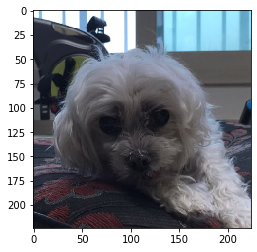

In [102]:
plt.imshow(myDogImage)

In [106]:
myDogImage = np.expand_dims(myDogImage,axis=0)

In [107]:
myDogImage.shape

(1, 224, 224, 3)

In [115]:
a = inception_bottle_neck(myDogImage)

In [116]:
a.shape

TensorShape([1, 2048])

In [117]:
preds = model.predict(a)

In [154]:
predict = np.argsort(preds)[0][-3:][::-1]

In [161]:
for i in predict:
    print(dogs_name_list[i],": ",preds[0][i])

Maltese_dog :  0.98348296
miniature_poodle :  0.009761077
Dandie_Dinmont :  0.00508181
